In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

2025-01-01 16:48:15.228981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-01 16:48:15.404634: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-01 16:48:15.441391: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-01 16:48:15.640835: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-01 16:48:17.240096: W tensorflow/compiler/tf2

In [3]:
dataset_train = pd.read_csv('data/Google_Stock_Price_Train.csv')

dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
tranining_set = dataset_train.iloc[:, 1:2].values

tranining_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
sc = MinMaxScaler(feature_range=(0,1))

training_set_scaled = sc.fit_transform(tranining_set)

training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
print(X_train.shape)

(1198, 60)


In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape

(1198, 60, 1)

In [13]:
modelo = Sequential()

# LSTM
modelo.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Dropout
modelo.add(Dropout(0.2))

# LSTM
modelo.add(LSTM(units=50, return_sequences=True))

# Dropout
modelo.add(Dropout(0.2))

# LSTM
modelo.add(LSTM(units=50, return_sequences=True))

# Dropout
modelo.add(Dropout(0.2))

# LSTM
modelo.add(LSTM(units=50))

# Dropout
modelo.add(Dropout(0.2))

# Camada de saída
modelo.add(Dense(units=1))

/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# loss = mean_squared_error porque é um problema de regressão
modelo.compile(optimizer="adam", loss="mean_squared_error")

early_stop = EarlyStopping(monitor="loss", mode="min", verbose=1, patience=30)

modelo.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=[early_stop])

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.1236
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0084
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0059
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0051
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0044
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0058
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0045
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0039
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0046
Epoch 10/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0043
Epoch 11/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0064
Epoch 12/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0044
Epoch 13/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0043
Epoch 14/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0044
Epoch 15/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 149

In [15]:
dataset_test = pd.read_csv('data/Google_Stock_Price_Test.csv')

real_stock_price = dataset_test.iloc[:, 1:2].values

real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [19]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [20]:
inputs = inputs.reshape(-1, 1)

In [21]:
inputs[:5]

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76]])

In [22]:
inputs = sc.transform(inputs)

inputs[:5]

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032]])

In [23]:
X_test = []

# 60 primeiros valores
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

# Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
predicted_stock_price = modelo.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


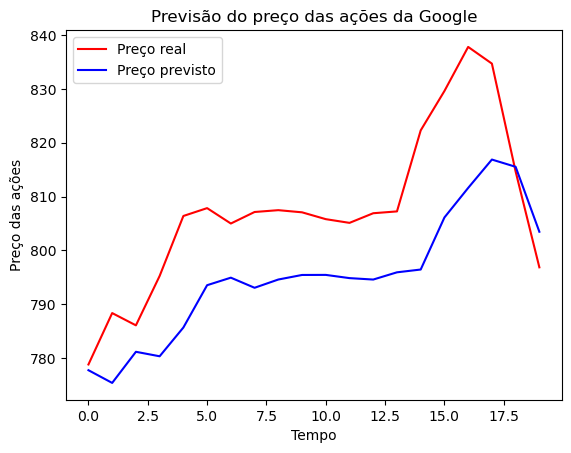

In [25]:
plt.plot(real_stock_price, color="red", label="Preço real")
plt.plot(predicted_stock_price, color="blue", label="Preço previsto")
plt.title("Previsão do preço das ações da Google")
plt.xlabel("Tempo")
plt.ylabel("Preço das ações")
plt.legend()
plt.show()